 ## SkyInsight: Time Series Weather Forecasting System

SkyInsight is a powerful system designed to accurately classify weather conditions as Overcast, Clear, or Foggy. This classifier employs advanced techniques from machine learning domains to achieve precise weather Forecasting.


In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA
import warnings
warnings.simplefilter('ignore')
sns.set_theme(style="dark")
from sklearn.cluster import KMeans

In [2]:
# Fetching data
data1 = pd.read_csv(r"C:\Users\Rushkesh\OneDrive\Desktop\Sys Project\weatherHistory.csv")
data1.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
# Analyzing the Data types and Exploring the number of entities in a feature
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
# Checking Statistical Summary
data1.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
# Checking Target Variable
print(data1["Summary"].value_counts())

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [6]:
# Reduced Data (Using only 3 classes)
data = data1[(data1["Summary"] == "Overcast") | (data1["Summary"] == "Clear") | (data1["Summary"] == "Foggy")]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34635 entries, 46 to 96436
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            34635 non-null  object 
 1   Summary                   34635 non-null  object 
 2   Precip Type               34396 non-null  object 
 3   Temperature (C)           34635 non-null  float64
 4   Apparent Temperature (C)  34635 non-null  float64
 5   Humidity                  34635 non-null  float64
 6   Wind Speed (km/h)         34635 non-null  float64
 7   Wind Bearing (degrees)    34635 non-null  float64
 8   Visibility (km)           34635 non-null  float64
 9   Loud Cover                34635 non-null  float64
 10  Pressure (millibars)      34635 non-null  float64
 11  Daily Summary             34635 non-null  object 
dtypes: float64(8), object(4)
memory usage: 3.4+ MB


In [7]:
# Calculating Missing Values
missing_values_count = data.isnull().sum()
missing_values_count

Formatted Date                0
Summary                       0
Precip Type                 239
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [8]:
# Since 359 is a reasonable count. Dropping the respective rows. If the count were smaller we would've filled it up with dummy values
data.dropna(inplace=True) 
# Again checking for values
missing_values_count = data.isnull().sum()
missing_values_count

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [9]:
# Calculating number of duplicated values
print("Duplicated Values: ",data.duplicated().sum())

Duplicated Values:  17


In [10]:
# Removing duplicated values
data.drop_duplicates(inplace=True)
# Again checking for duplicated values
print("Duplicated Values: ", data.duplicated().sum())

Duplicated Values:  0


In [11]:
# Rounding up the float64 data upto 2 decimals.
float_cols = data.select_dtypes(include='float')
data[float_cols.columns] = float_cols.round(2)
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
46,2006-04-10 22:00:00.000 +0200,Overcast,rain,14.42,14.42,0.58,20.01,159.0,15.83,0.0,1007.85,Mostly cloudy throughout the day.
47,2006-04-10 23:00:00.000 +0200,Overcast,rain,14.26,14.26,0.59,16.50,168.0,14.96,0.0,1007.89,Mostly cloudy throughout the day.
48,2006-04-11 00:00:00.000 +0200,Overcast,rain,13.77,13.77,0.60,17.10,160.0,15.83,0.0,1007.36,Foggy in the evening.
49,2006-04-11 01:00:00.000 +0200,Overcast,rain,13.28,13.28,0.63,14.36,160.0,15.83,0.0,1007.26,Foggy in the evening.
50,2006-04-11 02:00:00.000 +0200,Overcast,rain,8.63,5.47,0.87,22.04,32.0,6.70,0.0,1005.10,Foggy in the evening.


In [12]:
# Formatting Date Column. This can be used to identify any seasonality and trends
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], errors='coerce')
# Extracting the relevant components
data["Time"] = [d.time() for d in data['Formatted Date']]
data["Time"] = data["Time"].astype(str)
data["Time"] = data["Time"].str.split(':').str[0].astype(int)
data["Date"] = [d.date() for d in data['Formatted Date']]
data["Date"]= data["Date"].astype(str)
data["Year"] = data["Date"].str.split('-').str[0].astype(int)
data["Month"] = data["Date"].str.split('-').str[1].astype(int)
data["Day"] = data["Date"].str.split('-').str[2].astype(int)
# Dropping the original column 
data = data.drop(columns=['Formatted Date','Date'], axis=1)

* #### Redundant Columns Treatment

In [13]:
# It can be seen that the feature "Loud Cover" have only value '0' and mean and other statistical overview also support the deduction. Hence, it is the redundant column
data["Loud Cover"].value_counts()

0.0    34379
Name: Loud Cover, dtype: int64

In [14]:
# Removing 'Loud Cover'
data.drop(columns=["Loud Cover"], axis=1, inplace=True)
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Time,Year,Month,Day
46,Overcast,rain,14.42,14.42,0.58,20.01,159.0,15.83,1007.85,Mostly cloudy throughout the day.,22,2006,4,10
47,Overcast,rain,14.26,14.26,0.59,16.50,168.0,14.96,1007.89,Mostly cloudy throughout the day.,23,2006,4,10
48,Overcast,rain,13.77,13.77,0.60,17.10,160.0,15.83,1007.36,Foggy in the evening.,0,2006,4,11
49,Overcast,rain,13.28,13.28,0.63,14.36,160.0,15.83,1007.26,Foggy in the evening.,1,2006,4,11
50,Overcast,rain,8.63,5.47,0.87,22.04,32.0,6.70,1005.10,Foggy in the evening.,2,2006,4,11


* #### Outlier Treatment

In [15]:
# Different types of columns
numeric_columns = list(data.select_dtypes(include=['float64', 'int64']).columns)
categorical_columns = list(data.select_dtypes(include=['object']).columns)
continuous_columns = [i for i in numeric_columns if len(list(data[i].unique()))>=25]
discrete_columns = [i for i in numeric_columns if len(list(data[i].unique()))<25]
print("Numerical Columns: ", numeric_columns)
print()
print("Categorical Columns: ", categorical_columns)
print()
print("Continuous Columns: ", continuous_columns)
print()
print("Discrete Columns: ", discrete_columns)

Numerical Columns:  ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

Categorical Columns:  ['Summary', 'Precip Type', 'Daily Summary']

Continuous Columns:  ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

Discrete Columns:  []


In [16]:
data1[["Date-Time","TZ"]]=data1["Formatted Date"].str.split("+",expand=True)
df1=data1.drop(columns="Formatted Date")
df1.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date-Time,TZ
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00.000,0200
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00.000,0200
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00.000,0200
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00.000,0200
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00.000,0200


In [17]:
columns_order=["Date-Time","TZ","Summary","Precip Type","Temperature (C)","Apparent Temperature (C)",
                "Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Loud Cover",
                "Pressure (millibars)", "Daily Summary"]
df2=df1.reindex(columns=columns_order)
df3=df2.drop(columns="TZ")
df3.head()

,Date-Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [18]:
df3["Date-Time"]=pd.to_datetime(df3["Date-Time"])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date-Time                 96453 non-null  datetime64[ns]
 1   Summary                   96453 non-null  object        
 2   Precip Type               95936 non-null  object        
 3   Temperature (C)           96453 non-null  float64       
 4   Apparent Temperature (C)  96453 non-null  float64       
 5   Humidity                  96453 non-null  float64       
 6   Wind Speed (km/h)         96453 non-null  float64       
 7   Wind Bearing (degrees)    96453 non-null  float64       
 8   Visibility (km)           96453 non-null  float64       
 9   Loud Cover                96453 non-null  float64       
 10  Pressure (millibars)      96453 non-null  float64       
 11  Daily Summary             96453 non-null  object        
dtypes: datetime64[ns](

In [19]:
df3["Year"]=pd.DatetimeIndex(df3["Date-Time"]).year
df3["Month"]=df3["Date-Time"].dt.month_name()
df3["day"]=df3["Date-Time"].dt.day
df3.head()

,Date-Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,day
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,April,1
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,April,1
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,April,1
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,April,1
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,April,1


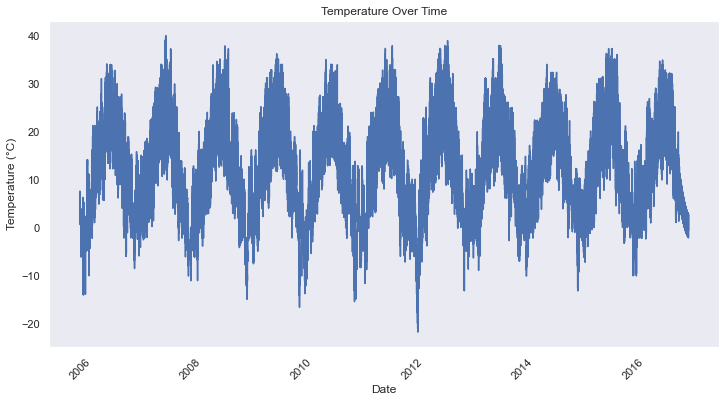

In [20]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Line plot for temperature over time
sns.lineplot(x='Date-Time', y='Temperature (C)', data=df3)
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


* In this plot we see that the our Temperature coloum present in seasonality

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
# Fit an ARIMA model to temperature data
model = ARIMA(df3['Apparent Temperature (C)'], order=(1, 1, 1))
model_fit = model.fit()

In [22]:
# Make future temperature predictions
forecast_steps = 3 # Number of steps to forecast
forecast, stderr, conf_int = model_fit.forecast(steps=3)
print(forecast)
print(stderr)
print(conf_int)

20.009540178969985
19.712848087217285
19.507825467432966


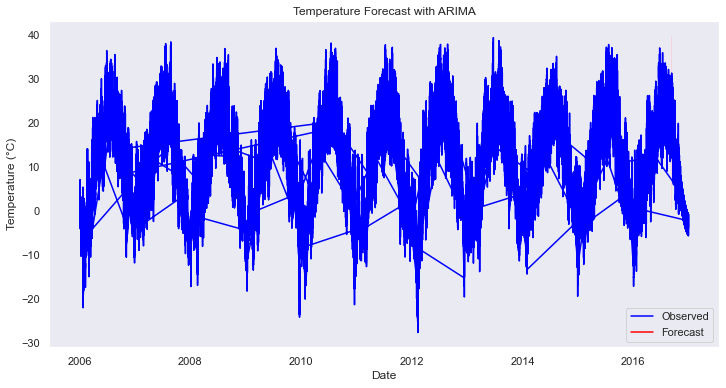

In [23]:
# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df3['Date-Time'], df3['Apparent Temperature (C)'], label='Observed', color='blue')
plt.plot(df3['Date-Time'].iloc[-1:], forecast, label='Forecast', color='red')
plt.fill_between(df3['Date-Time'].iloc[-1:], forecast - stderr, forecast + stderr, color='pink', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Forecast with ARIMA')
plt.legend()
plt.show()

0.6206820977236034
0.6278596175560922
0.6326823398601521


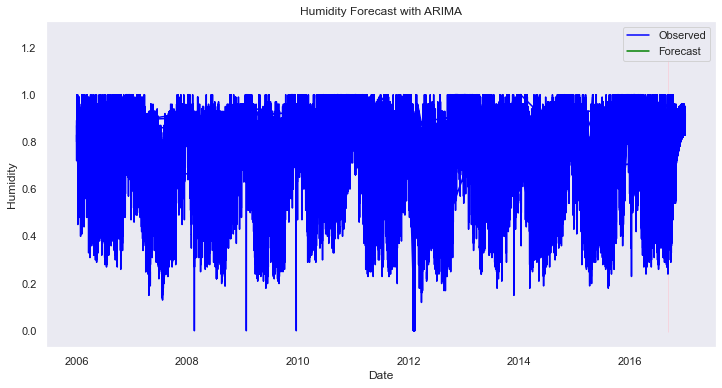

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
# Fit an ARIMA model to temperature data
model = ARIMA(df3['Humidity'], order=(1, 1, 1))
model_fit = model.fit()

# Make future temperature predictions
forecast_steps = 3  # Number of steps to forecast
forecast, stderr, conf_int = model_fit.forecast(steps=forecast_steps)
print(forecast)
print(stderr)
print(conf_int)

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df3['Date-Time'], df3['Humidity'], label='Observed', color='blue')
plt.plot(df3['Date-Time'].iloc[-1:], forecast, label='Forecast', color='green')
plt.fill_between(df3['Date-Time'].iloc[-1:], forecast - stderr, forecast + stderr, color='pink', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Humidity Forecast with ARIMA')
plt.legend()
plt.show()


1015.131169948548
1015.2343903380395
1015.2240344500173


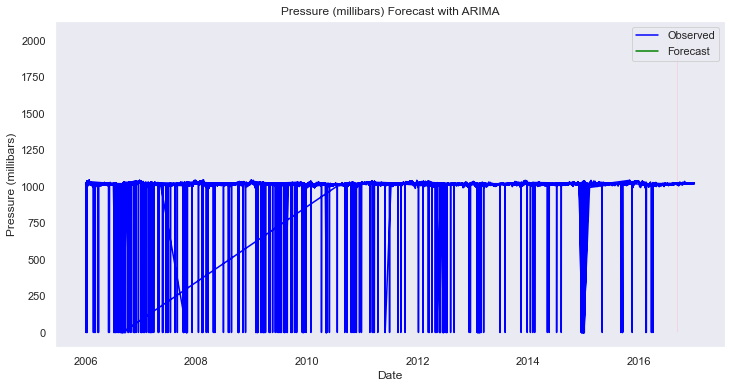

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
# Fit an ARIMA model to temperature data
model = ARIMA(df3['Pressure (millibars)'], order=(1, 1, 1))
model_fit = model.fit()

# Make future temperature predictions
forecast_steps = 3  # Number of steps to forecast
forecast, stderr, conf_int = model_fit.forecast(steps=forecast_steps)
print(forecast)
print(stderr)
print(conf_int)

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df3['Date-Time'], df3['Pressure (millibars)'], label='Observed', color='blue')
plt.plot(df3['Date-Time'].iloc[-1:], forecast, label='Forecast', color='green')
plt.fill_between(df3['Date-Time'].iloc[-1:], forecast - stderr, forecast + stderr, color='pink', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Pressure (millibars)')
plt.title('Pressure (millibars) Forecast with ARIMA')
plt.legend()
plt.show()

15.49117467627665
15.469325651649688
15.452991191793283


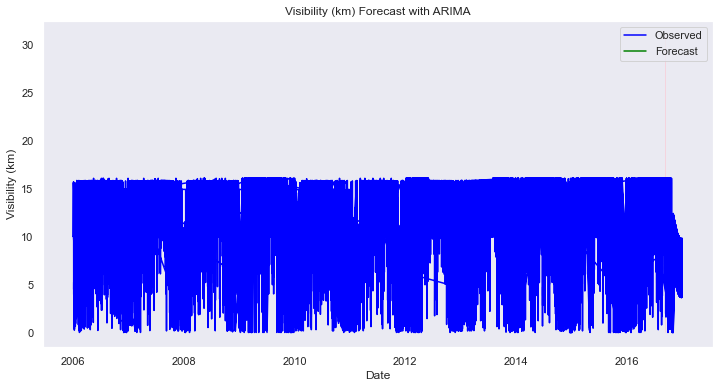

In [26]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
# Fit an ARIMA model to temperature data
model = ARIMA(df3['Visibility (km)'], order=(1, 1, 1))
model_fit = model.fit()

# Make future temperature predictions
forecast_steps = 3  # Number of steps to forecast
forecast, stderr, conf_int = model_fit.forecast(steps=forecast_steps)
print(forecast)
print(stderr)
print(conf_int)

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df3['Date-Time'], df3['Visibility (km)'], label='Observed', color='blue')
plt.plot(df3['Date-Time'].iloc[-1:], forecast, label='Forecast', color='green')
plt.fill_between(df3['Date-Time'].iloc[-1:], forecast - stderr, forecast + stderr, color='pink', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Visibility (km)')
plt.title('Visibility (km) Forecast with ARIMA')
plt.legend()
plt.show()

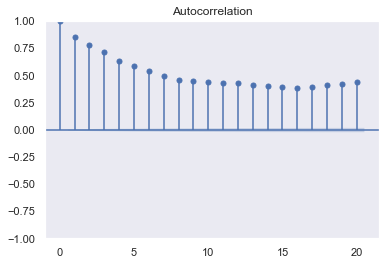

In [27]:
plot_acf(df3['Visibility (km)'], lags=20);

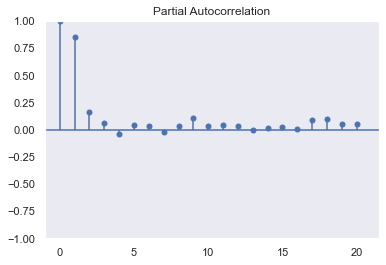

In [28]:
plot_pacf(df3['Visibility (km)'], lags=20);

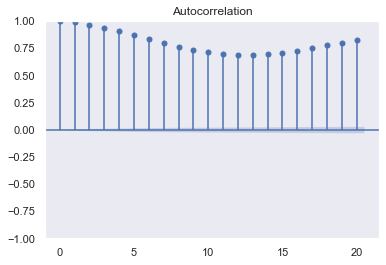

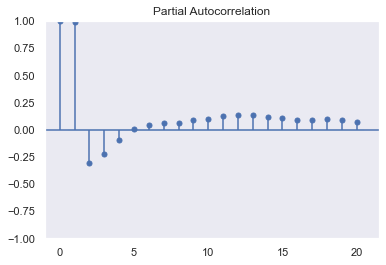

In [29]:
plot_acf(df3['Temperature (C)'], lags=20);
plot_pacf(df3['Temperature (C)'], lags=20);

* In this above model we find out the forcast value of all variable also standard Error and Confidance interval in all variable.